# Execute the code below

In [1]:
import pandas as pd
import seaborn as sns

url = "https://raw.githubusercontent.com/LucaSainteCroix/teaching-resources/main/exercises-data/spotify.zip"
df_music = pd.read_csv(url)
df_zoom = df_music.loc[df_music.genre.isin(['Country', 'Classical']), ['genre', 'duration_ms', 'speechiness']].reset_index(drop = True)
df_zoom

,genre,duration_ms,speechiness
0,Country,200013,0.0444
1,Country,208187,0.0569
2,Country,123360,0.0960
3,Country,238600,0.0368
4,Country,243000,0.0330
...,...,...,...
17915,Country,179147,0.0322
17916,Country,230400,0.0832
17917,Country,216093,0.0268
17918,Country,179947,0.0909


# Standardization and classification

You now have a dataset with Country and Classical musics, and 2 numerical features : duration and speechiness.
Our goal will be to predict genre from numerical features.

## Draw a scatterplot from df_zoom with
- 'duration_ms' on X axis
- 'speechiness' on Y axis
- 'genre' in hue

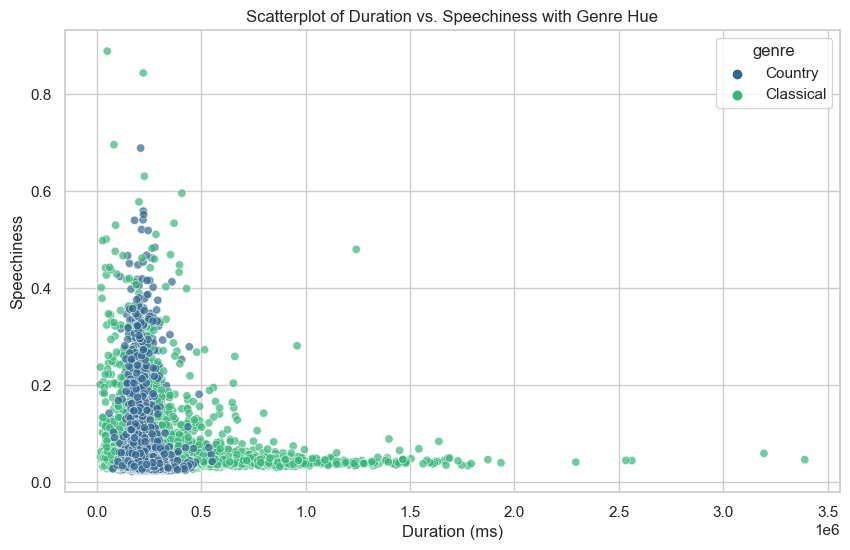

In [2]:
# Your code here :
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_zoom, x='duration_ms', y='speechiness', hue='genre', palette='viridis', alpha=0.7)
plt.title('Scatterplot of Duration vs. Speechiness with Genre Hue')
plt.xlabel('Duration (ms)')
plt.ylabel('Speechiness')
plt.show()

## Classification
From df_zoom :
- define X (`duration_ms` and `speechiness`)
- define y (`genre`)
- split your datas into train and test datasets, and `random_state = 2`
- perform 3 classification algorithms (Logistic Regression, KNN and Decision Tree)
- score your 3 models with accuracy score on the train dataset and on the test dataset


In [3]:
# Your code here :
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = df_zoom[['duration_ms', 'speechiness']]
y = df_zoom['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

y_train_pred_logreg = logistic_regression_model.predict(X_train)
y_train_pred_knn = knn_model.predict(X_train)
y_train_pred_tree = decision_tree_model.predict(X_train)

# Predictions on the test set
y_test_pred_logreg = logistic_regression_model.predict(X_test)
y_test_pred_knn = knn_model.predict(X_test)
y_test_pred_tree = decision_tree_model.predict(X_test)

# Evaluate the models on the train set
accuracy_train_logreg = accuracy_score(y_train, y_train_pred_logreg)
accuracy_train_knn = accuracy_score(y_train, y_train_pred_knn)
accuracy_train_tree = accuracy_score(y_train, y_train_pred_tree)

accuracy_test_logreg = accuracy_score(y_test, y_test_pred_logreg)
accuracy_test_knn = accuracy_score(y_test, y_test_pred_knn)
accuracy_test_tree = accuracy_score(y_test, y_test_pred_tree)

print("Accuracy on Train Set (Logistic Regression):", accuracy_train_logreg)
print("Accuracy on Train Set (KNN):", accuracy_train_knn)
print("Accuracy on Train Set (Decision Tree):", accuracy_train_tree)

print("\nAccuracy on Test Set (Logistic Regression):", accuracy_test_logreg)
print("Accuracy on Test Set (KNN):", accuracy_test_knn)
print("Accuracy on Test Set (Decision Tree):", accuracy_test_tree)

Accuracy on Train Set (Logistic Regression): 0.5181361607142857
Accuracy on Train Set (KNN): 0.7986886160714286
Accuracy on Train Set (Decision Tree): 0.9997209821428571

Accuracy on Test Set (Logistic Regression): 0.5100446428571429
Accuracy on Test Set (KNN): 0.7056361607142857
Accuracy on Test Set (Decision Tree): 0.7366071428571429



You have to find these accuracy scores for test set :
- Logistic regression : 0.50982
- KNN : 0.71295
- Decision tree : 0.73728

It seems Decision tree is better, but did you look at the overfitting ?

## Standardization

- Fit your scaler model on X_train
- Transform X_train and X_test  with your scaler model into  X_train_scaled and X_test_scaled
- perform and score the same 3 classification algorithms, but with X_train_scaled and X_test_scaled

In [4]:
# Your code here :
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logistic_regression_model_scaled = LogisticRegression()
logistic_regression_model_scaled.fit(X_train_scaled, y_train)

knn_model_scaled = KNeighborsClassifier()
knn_model_scaled.fit(X_train_scaled, y_train)

decision_tree_model_scaled = DecisionTreeClassifier()
decision_tree_model_scaled.fit(X_train_scaled, y_train)

y_train_pred_logreg_scaled = logistic_regression_model_scaled.predict(X_train_scaled)
y_train_pred_knn_scaled = knn_model_scaled.predict(X_train_scaled)
y_train_pred_tree_scaled = decision_tree_model_scaled.predict(X_train_scaled)

y_test_pred_logreg_scaled = logistic_regression_model_scaled.predict(X_test_scaled)
y_test_pred_knn_scaled = knn_model_scaled.predict(X_test_scaled)
y_test_pred_tree_scaled = decision_tree_model_scaled.predict(X_test_scaled)

accuracy_train_logreg_scaled = accuracy_score(y_train, y_train_pred_logreg_scaled)
accuracy_train_knn_scaled = accuracy_score(y_train, y_train_pred_knn_scaled)
accuracy_train_tree_scaled = accuracy_score(y_train, y_train_pred_tree_scaled)

accuracy_test_logreg_scaled = accuracy_score(y_test, y_test_pred_logreg_scaled)
accuracy_test_knn_scaled = accuracy_score(y_test, y_test_pred_knn_scaled)
accuracy_test_tree_scaled = accuracy_score(y_test, y_test_pred_tree_scaled)

print("Accuracy on Train Set (Logistic Regression, Standardized):", accuracy_train_logreg_scaled)
print("Accuracy on Train Set (KNN, Standardized):", accuracy_train_knn_scaled)
print("Accuracy on Train Set (Decision Tree, Standardized):", accuracy_train_tree_scaled)

print("\nAccuracy on Test Set (Logistic Regression, Standardized):", accuracy_test_logreg_scaled)
print("Accuracy on Test Set (KNN, Standardized):", accuracy_test_knn_scaled)
print("Accuracy on Test Set (Decision Tree, Standardized):", accuracy_test_tree_scaled)


Accuracy on Train Set (Logistic Regression, Standardized): 0.6586216517857143
Accuracy on Train Set (KNN, Standardized): 0.8355887276785714
Accuracy on Train Set (Decision Tree, Standardized): 0.9997209821428571

Accuracy on Test Set (Logistic Regression, Standardized): 0.6693638392857143
Accuracy on Test Set (KNN, Standardized): 0.7745535714285714
Accuracy on Test Set (Decision Tree, Standardized): 0.7349330357142857


# Conclusion
- Decision tree is insensitive to Standardization.
- Logistic regression and KNN have better result after Standardization.


We can remember that standardization is always good in preprocessing, before machine learning classifications and regressions. At worst, it does not change anything. At best, it improves results.